In [1]:
# importing 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np

from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

In [2]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)

groverCircuit4qubit = QuantumCircuit(qr, cr)
qc = groverCircuit4qubit

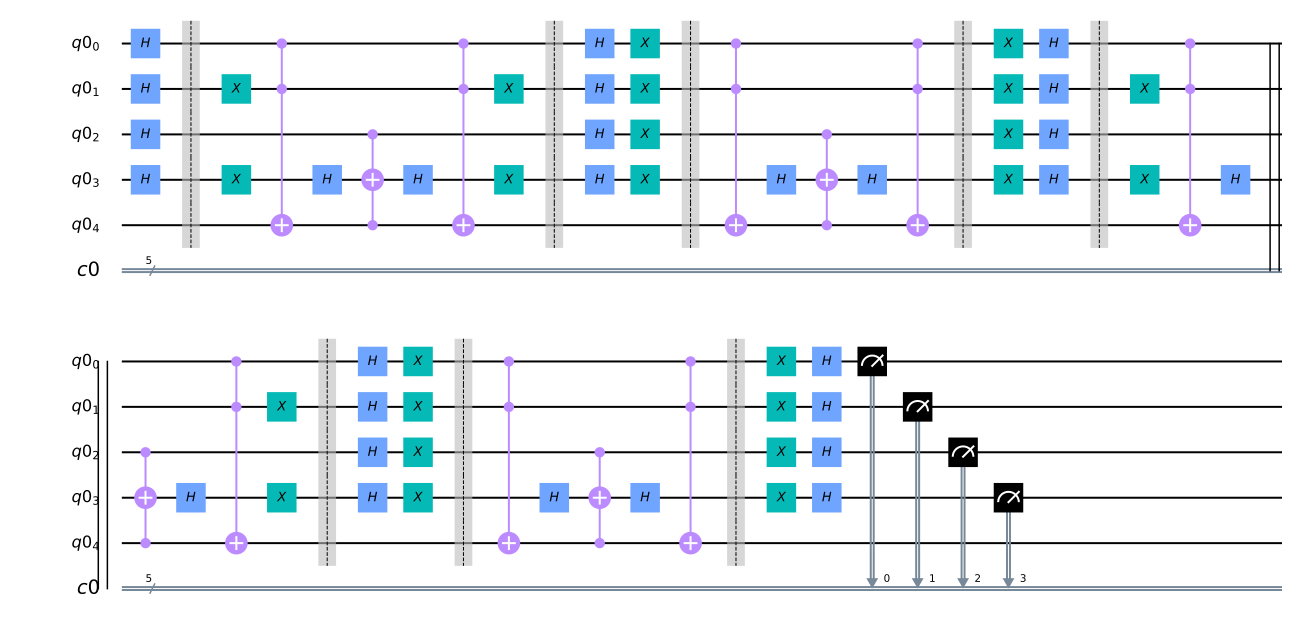

In [3]:
# circuit
qc.h(range(4))
qc.barrier()

qc.x([1,3])

# cccz
qc.ccx(qr[0], qr[1], qr[4])
qc.h(3)
qc.ccx(qr[2],qr[4],qr[3])
qc.h(3)
qc.ccx(qr[0], qr[1], qr[4])

qc.x([1,3])

qc.barrier()

qc.h(range(4))
qc.x(range(4))
qc.barrier()

# cccz
qc.ccx(qr[0], qr[1], qr[4])
qc.h(3)
qc.ccx(qr[2],qr[4],qr[3])
qc.h(3)
qc.ccx(qr[0], qr[1], qr[4])
qc.barrier()

qc.x(range(4))
qc.h(range(4))
qc.barrier()

qc.x([1,3])

# cccz
qc.ccx(qr[0], qr[1], qr[4])
qc.h(3)
qc.ccx(qr[2],qr[4],qr[3])
qc.h(3)
qc.ccx(qr[0], qr[1], qr[4])

qc.x([1,3])

qc.barrier()

qc.h(range(4))
qc.x(range(4))
qc.barrier()

# cccz
qc.ccx(qr[0], qr[1], qr[4])
qc.h(3)
qc.ccx(qr[2],qr[4],qr[3])
qc.h(3)
qc.ccx(qr[0], qr[1], qr[4])
qc.barrier()

qc.x(range(4))
qc.h(range(4))

qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])
qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])

qc.draw(output='mpl')

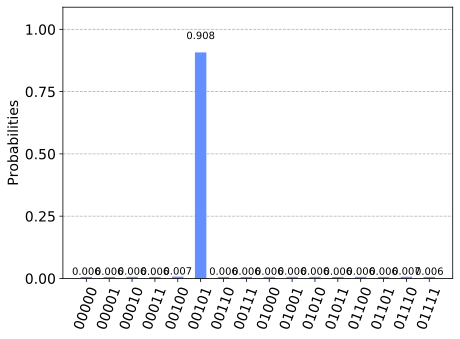

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=65536).result()
answer = results.get_counts()
plot_histogram(answer)